## Regression linéaire et ACP  

Dans cette etude, on va classifier et analyser des categories d'individus selon leur nutrition

On va commencer par une exploration des données :

## Analyse exploratoire 

### Importation des données

In [152]:
library(haven)
data <- as.data.frame(read_sav("data/ACP_1.sav"))

In [154]:
View(data)

CATG,PAO,PAA,VIO,VIA,POT,LEC,RAI,PLP
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AGRI,167,1,163,23,41,8,6,6
SAAG,162,2,141,12,40,12,4,15
PRIN,19,6,69,56,39,5,13,41
CSUP,87,11,63,111,27,3,18,39
CMOY,103,5,68,77,32,4,11,30
EMPL,111,4,72,66,34,6,10,28
OUVR,130,3,76,52,43,7,7,16
INAC,138,7,117,74,53,8,12,20


In [111]:
summary(data)

     CATG                PAO             PAA              VIO        
 Length:8           Min.   : 19.0   Min.   : 1.000   Min.   : 63.00  
 Class :character   1st Qu.: 99.0   1st Qu.: 2.750   1st Qu.: 68.75  
 Mode  :character   Median :120.5   Median : 4.500   Median : 74.00  
                    Mean   :114.6   Mean   : 4.875   Mean   : 96.12  
                    3rd Qu.:144.0   3rd Qu.: 6.250   3rd Qu.:123.00  
                    Max.   :167.0   Max.   :11.000   Max.   :163.00  
      VIA              POT             LEC              RAI       
 Min.   : 12.00   Min.   :27.00   Min.   : 3.000   Min.   : 4.00  
 1st Qu.: 44.75   1st Qu.:33.50   1st Qu.: 4.750   1st Qu.: 6.75  
 Median : 61.00   Median :39.50   Median : 6.500   Median :10.50  
 Mean   : 58.88   Mean   :38.62   Mean   : 6.625   Mean   :10.12  
 3rd Qu.: 74.75   3rd Qu.:41.50   3rd Qu.: 8.000   3rd Qu.:12.25  
 Max.   :111.00   Max.   :53.00   Max.   :12.000   Max.   :18.00  
      PLP       
 Min.   : 6.00  
 1st Qu

On va affecter les noms des categories au lignes et puis enlever la colonne des categories

In [150]:
rownames(data) <- data$CATG
data <- data[, -1]

In [151]:
head(data)

,PAA,VIO,VIA,POT,LEC,RAI,PLP
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,163,23,41,8,6,6
2,2,141,12,40,12,4,15
3,6,69,56,39,5,13,41
4,11,63,111,27,3,18,39
5,5,68,77,32,4,11,30
6,4,72,66,34,6,10,28


On faire un boxplot pour voir la variance de notre variables : 

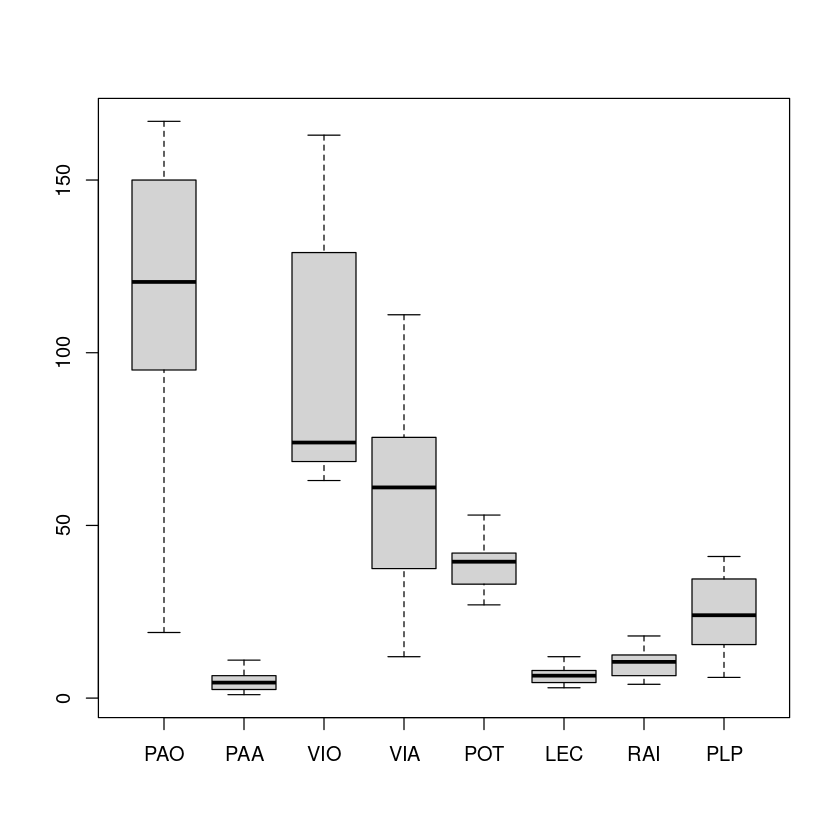

In [114]:
# le boxplot de donnees par variables
boxplot(data)

On voit que a consommation varie différemment.

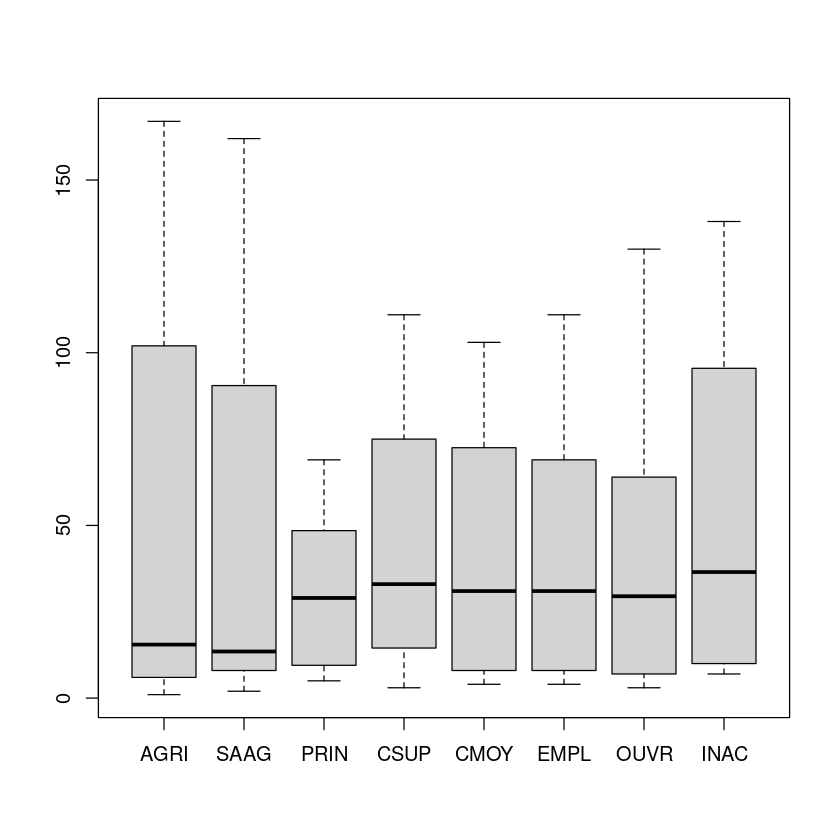

In [115]:
# le boxplot de donnees par categories
boxplot(t(data))

## Partie 1 : Regression linéaire entre les variables PAO et VIO

In [116]:
library(ggplot2)

`geom_smooth()` using formula = 'y ~ x'


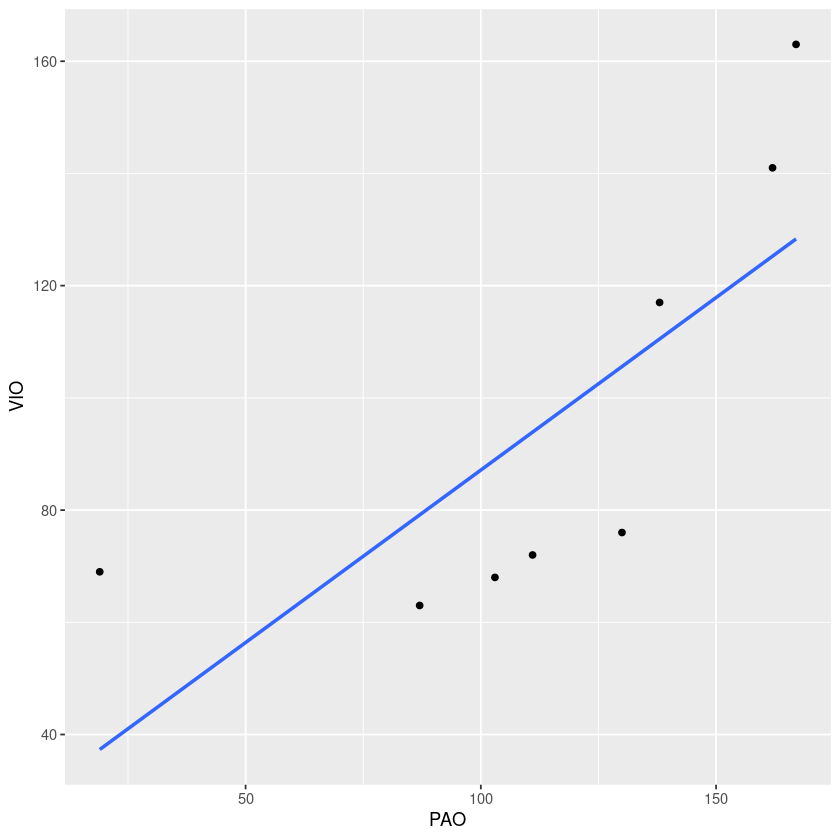

In [117]:
ggplot(data, aes(x = PAO, y = VIO)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

On voit qu'il peut etre une relation lineaire entre ces deux variables.

In [118]:
cor_test <- cor.test(data$VIO, data$PAO)
print(cor_test)


	Pearson's product-moment correlation

data:  data$VIO and data$PAO
t = 2.8087, df = 6, p-value = 0.03081
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1044559 0.9524829
sample estimates:
      cor 
0.7536544 



Comme on voit, la p_value de test est $ > \alpha $ qui vaut $0.05$, donc il existe une correlation qui vaut $0.75$ dans ce cas

In [119]:
reg <- lm(PAO ~ VIO, data = data)
summary(reg)


Call:
lm(formula = PAO ~ VIO, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.567  -0.119   5.005  15.433  33.967 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  25.8238    33.7942   0.764   0.4737  
VIO           0.9238     0.3289   2.809   0.0308 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.76 on 6 degrees of freedom
Multiple R-squared:  0.568,	Adjusted R-squared:  0.496 
F-statistic: 7.889 on 1 and 6 DF,  p-value: 0.03081


Dans l'ensemble, le modèle semble significatif avec une p-valeur globale du F-statistic inférieure à 0.05, et la variable VIO a une influence significative sur la variable dépendante PAO. Cependant, la variable b (Intercepta) a une $p_{value} > 0.05$ qui n'est pas significatif.


In [120]:
# Exemple de test de Shapiro-Wilk avec R
shapiro.test(residuals(reg))


	Shapiro-Wilk normality test

data:  residuals(reg)
W = 0.80578, p-value = 0.033


D'apres cette valeur on peut dire que les residus ne suivent pas de distribution normal, ce qui assure que notre model est significatif. 

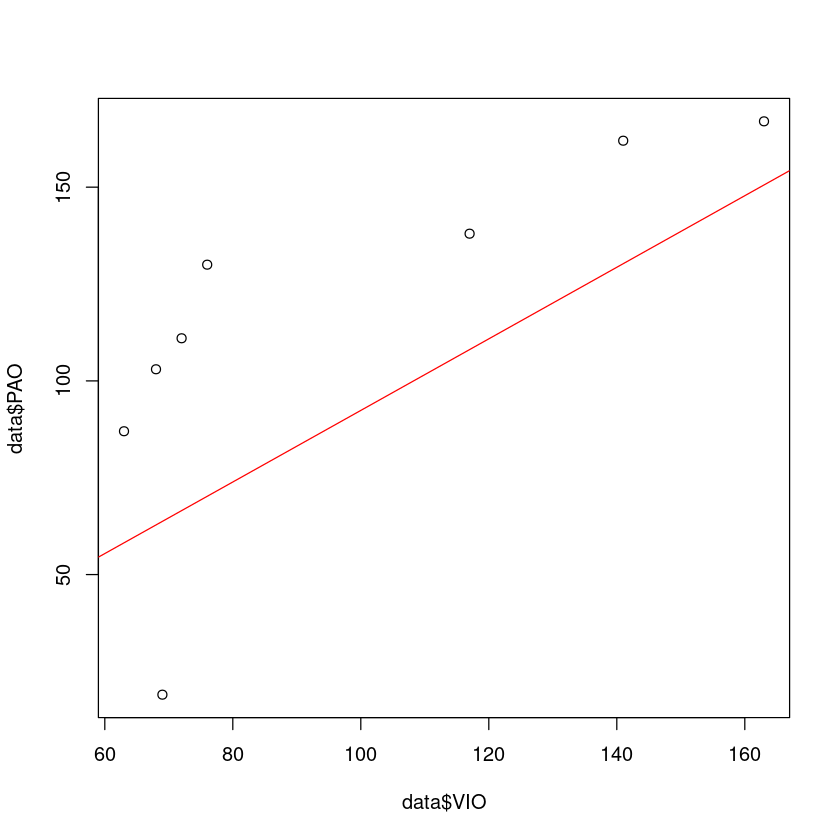

In [121]:
plot(data$VIO, data$PAO)
abline(0, 0.9238, col = "red")

## Partie 2 : Analyse en composant principale (ACP)

### Etude de correlation

On charge les library necessaires

In [122]:
library(car)
library(corrplot)

On calcule la matrice de correlation

In [123]:
# Afficher la matrice de correlation
cor_mat <- cor(data)
cor_mat

,PAO,PAA,VIO,VIA,POT,LEC,RAI,PLP
PAO,1.0000000,-0.5602719,0.7536544,-0.5040089,0.3708892,0.6942844,-0.6830504,-0.9101367
PAA,-0.5602719,1.0000000,-0.6040133,0.9044415,-0.3328879,-0.6733710,0.9588178,0.7712209
VIO,0.7536544,-0.6040133,1.0000000,-0.7501607,0.5170754,0.7917256,-0.6690062,-0.8279862
VIA,-0.5040089,0.9044415,-0.7501607,1.0000000,-0.4185661,-0.8386021,0.9239285,0.7197908
POT,0.3708892,-0.3328879,0.5170754,-0.4185661,1.0000000,0.6029189,-0.4099317,-0.5539561
LEC,0.6942844,-0.6733710,0.7917256,-0.8386021,0.6029189,1.0000000,-0.8244519,-0.7509231
RAI,-0.6830504,0.9588178,-0.6690062,0.9239285,-0.4099317,-0.8244519,1.0000000,0.8344475
PLP,-0.9101367,0.7712209,-0.8279862,0.7197908,-0.5539561,-0.7509231,0.8344475,1.0000000


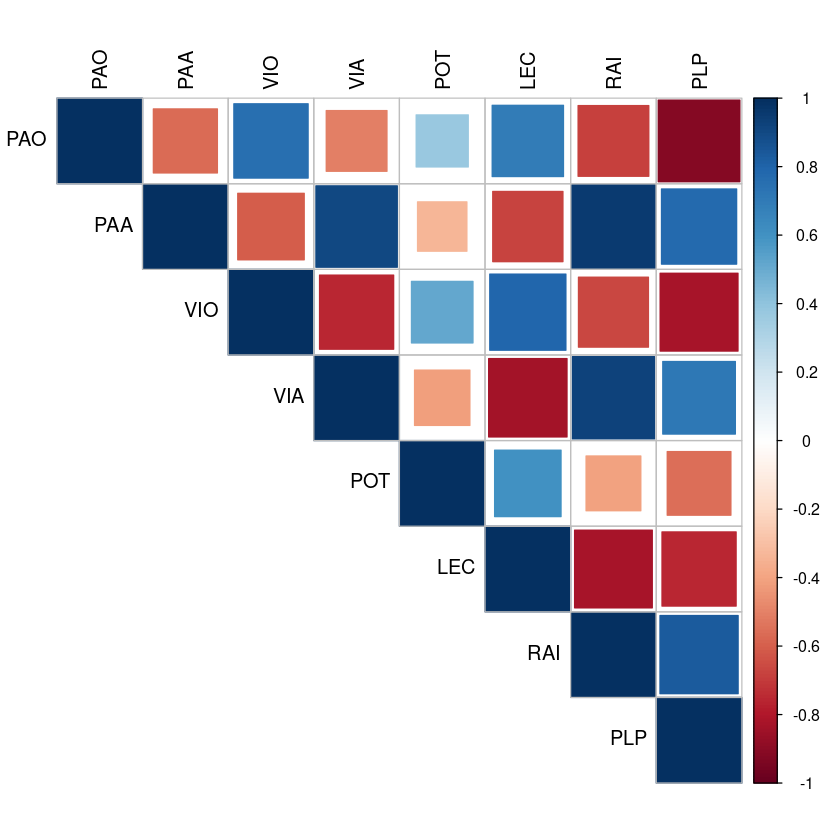

In [124]:
corrplot(cor(data), method = "square", type = "upper", tl.col = "black")

On voit qu'il ya des fortes correlations entre nos variables ce qui nous permet de faire l'ACP.

### Test de bartlett

In [125]:
library(psych)
cortest.bartlett(cor_mat, n = 100)

$chisq
[1] 4615.013

$p.value
[1] 0

$df
[1] 28

Une valeur de $\kappa^2$ trop élevé et une valeur $p_{value} < 0.05$ est suffisant pour rejeter l’hypothèse nulle qui dit que notre matrice de corrélation rassemble a la matrice d’identité, donc on assure qu'on a une corrélation entre nos variables, ce qui nous permettre de faire l'ACP  

### ACP

On faire la normalisation des donnees

In [126]:
data <- scale(data)

On charge les packages necessaires

In [127]:
library(factoextra)
library(FactoMineR)

In [135]:
# effectuer le pca sur les donnees
data.acp <- PCA(data, graph = FALSE)

On voir les résultats obtenus

In [136]:
data.acp$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,5.871030506,73.38788132,73.38788
comp 2,0.879908896,10.99886120,84.38674
comp 3,0.674201467,8.42751834,92.81426
comp 4,0.344043348,4.30054185,97.11480
comp 5,0.209660603,2.62075753,99.73556
comp 6,0.017632968,0.22041209,99.95597
comp 7,0.003522213,0.04402767,100.00000


Donc on remarque que les deux premières composantes ont des valeurs propres plus élevé par rapport au autres, et ils expliquent une pourcentage importante ($84.38\%$) de variance.

On assure ca avec le scree plot suivant

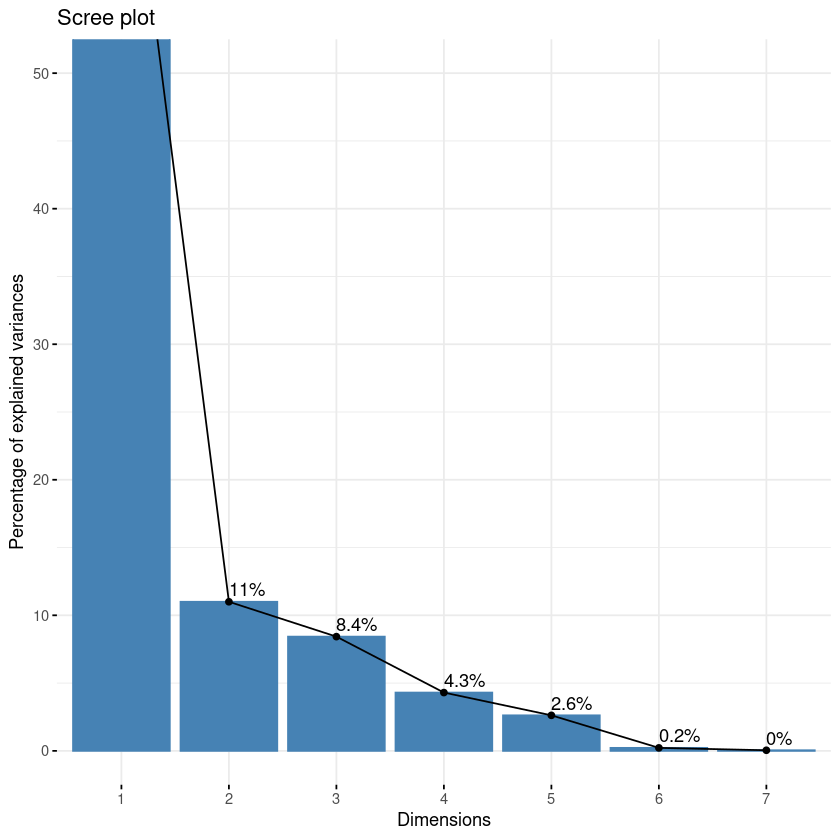

In [137]:
# affichage des composantes de l'ACP avec le pourcentage de chacun
fviz_eig(data.acp, addlabels = TRUE, ylim = c(0, 50))

### Contribution des variables dans les composantes

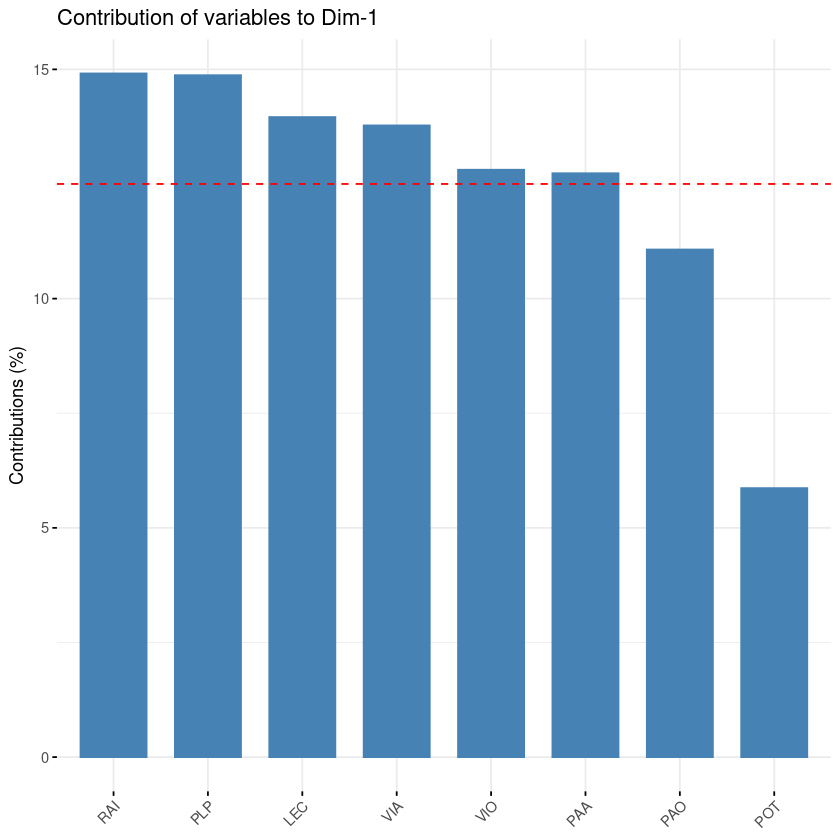

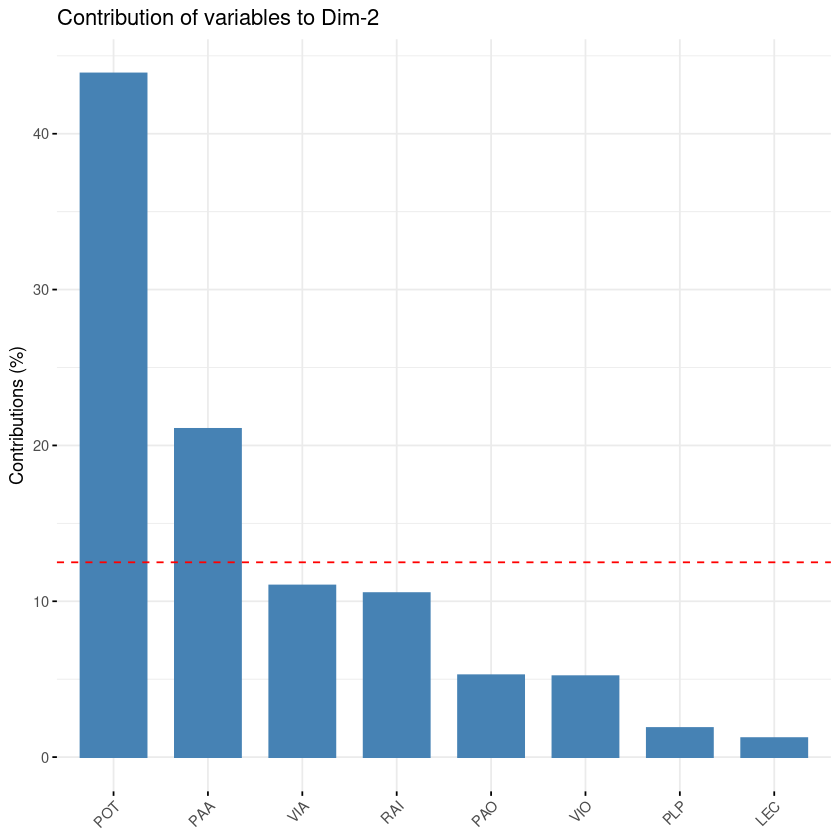

In [140]:
fviz_contrib(data.acp, choice = "var", axes = 1, top = 10)
fviz_contrib(data.acp, choice = "var", axes = 2, top = 10)

On voit que les variables qui contribuent au dimension 1 sont (RAI, PLP, LEC, VIA, VIO, PAA), et les variables qui contribuent au dimension 2 sont (POT, PAA)

### Contribution des individus dans les dimensions

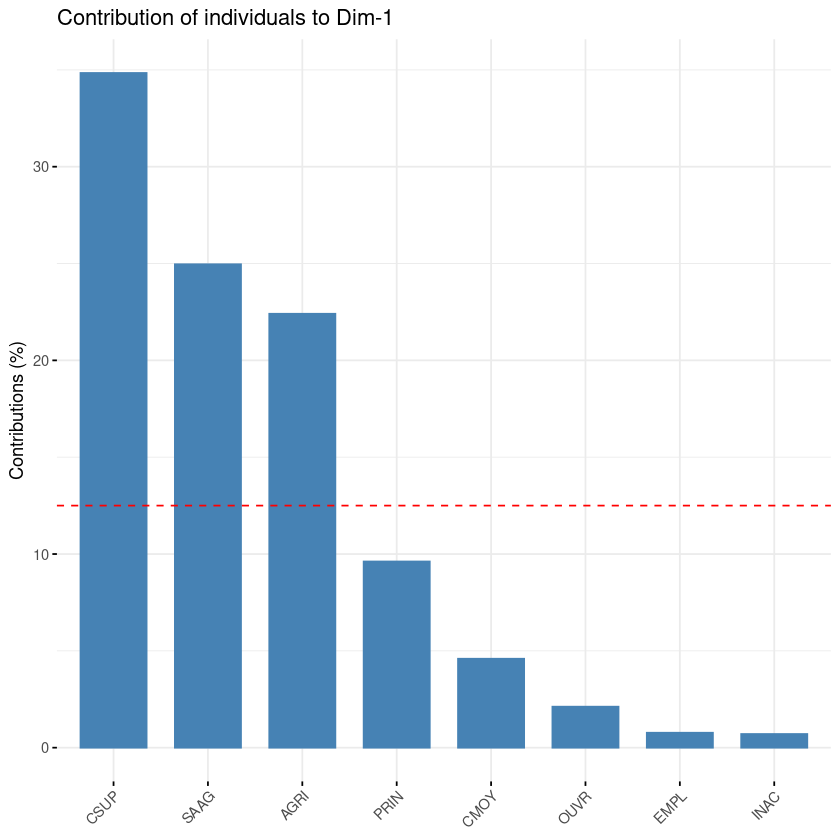

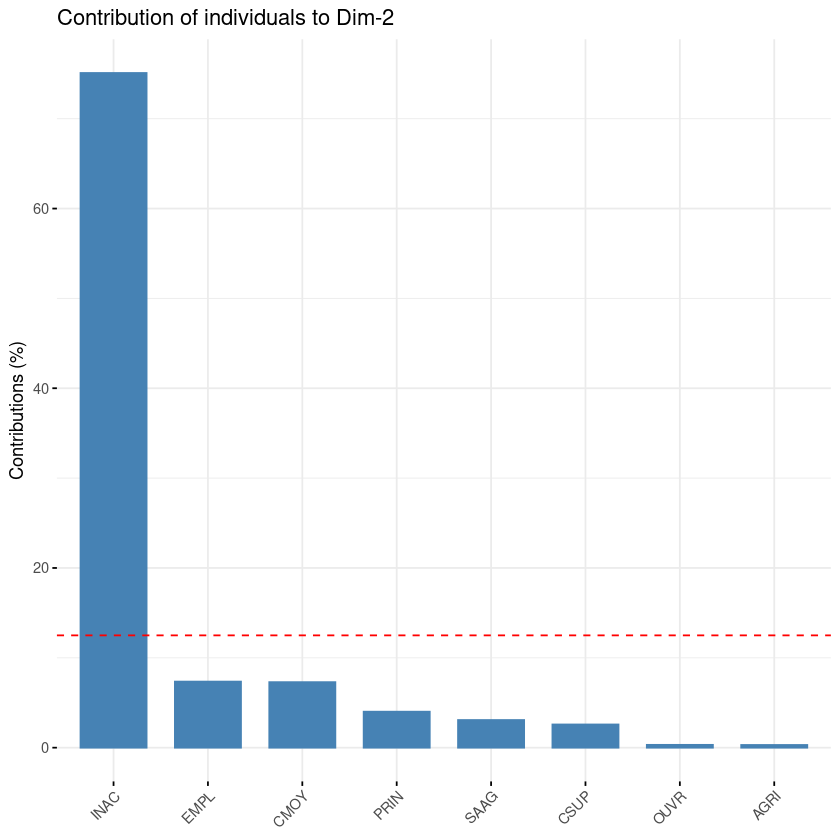

In [141]:
fviz_contrib(data.acp, choice = "ind", axes = 1, top = 10)
fviz_contrib(data.acp, choice = "ind", axes = 2, top = 10)

On voit que les individu (CSUP, SAAG, AGRI) contribuent au dimension 1, tant que l'individu (INAC) est le seul qui contribue au dimension 2. 

### Qualité de représentation des variables

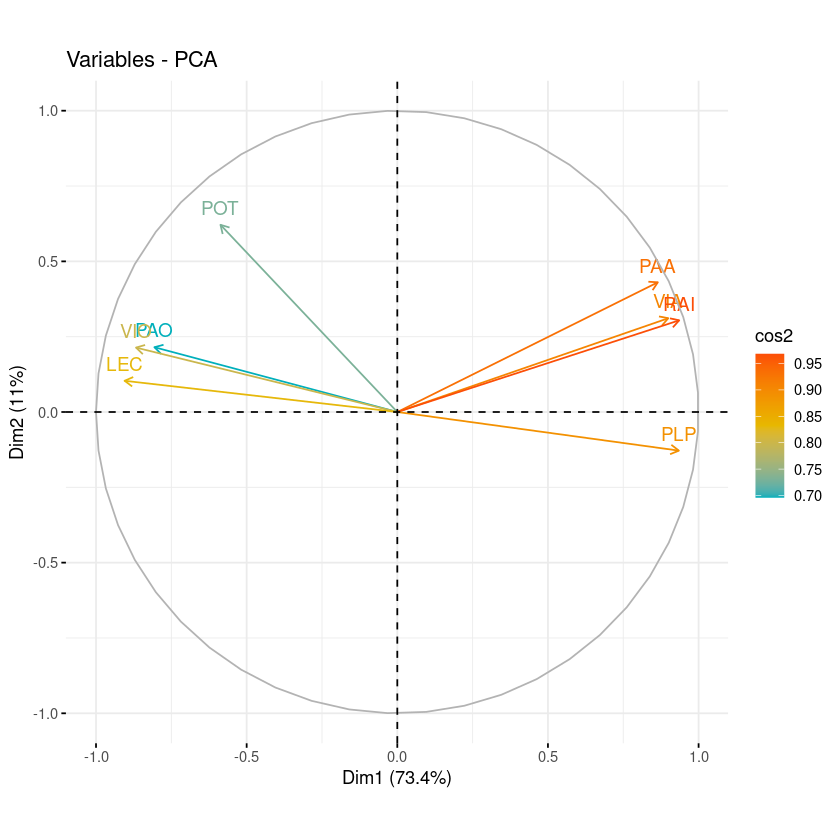

In [160]:
fviz_pca_var(data.acp, col.var = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"))

On regarde que les valeurs de cosinus de tout les variables sont proches de 1, alors on constate que les variables sont bien représentés.

### Biplot des contributions des variables et individus

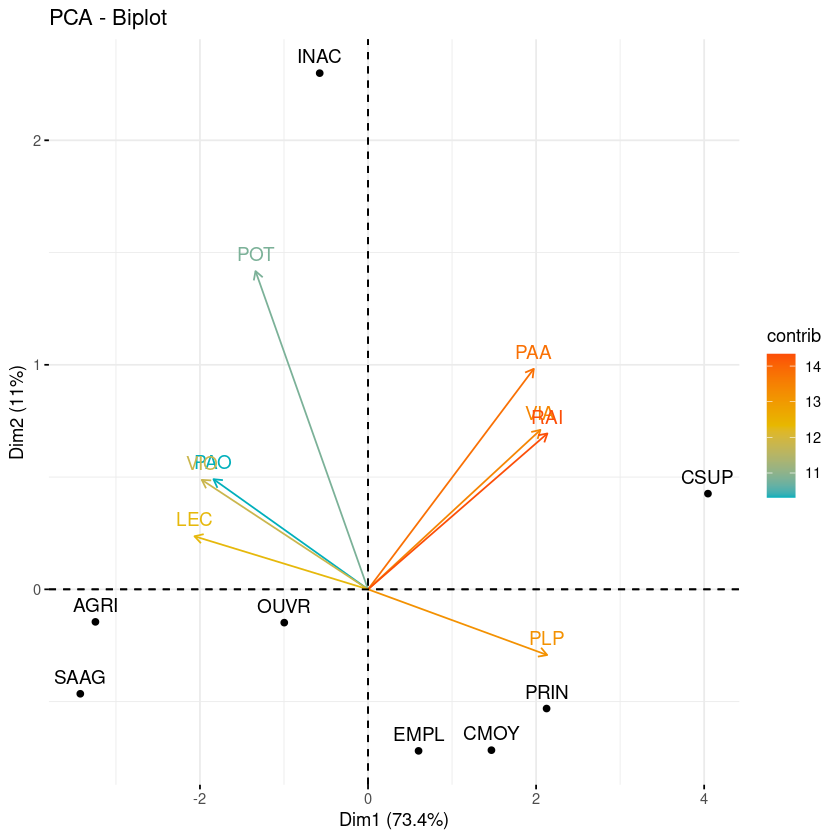

In [162]:
fviz_pca(data.acp, col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"))

Ces graphes vont nous aider a faire des conclusions et regroupement des individus dans la partie suivant.

## Conclusion et groupement

En conclusion de notre Analyse en Composantes Principales (ACP) sur les données de consommation, les résultats suggèrent des tendances distinctes dans la composition nutritionnelle en fonction des catégories de salaires. Les groupements d'individus peuvent être interprétés de la manière suivante :

1. **Groupe à Salaires Minimal (Agriculteurs, Salariés Agricoles, Ouvriers) :**
   - Ces individus présentent des schémas de consommation caractérisés par des produits alimentaires moins coûteux (pommes de terres, vin ordinaire, légumes secs, pain ordinaires).

2. **Groupe à Salaires Légèrement Élevés (Cadres Supérieurs, Personnel Administratif, Cadres Moyens) :**
   - Pour cette catégorie de salaires, on observe une tendance vers des habitudes alimentaires associées à des produits plus coûteux (autres vin, autre ain, plats préparés).
   - Les individus de ce groupe semblent opter pour une nutrition caractérisée par des articles de prix relativement élevé.

3. **Groupe à Salaires Moyens (Ouvrier, employée, Intérimaires ou Non-Classés ) :**
   - Les individus avec des salaires moyens semblent adopter une consommation alimentaire équilibrée, et il tend vers la moyenne pour tous les variables.

En résumé, l'analyse suggère que les préférences alimentaires peuvent être liées au niveau de revenu. Les groupements identifiés reflètent des différences dans les choix alimentaires en fonction des capacités financières des individus, avec des implications potentielles pour la planification nutritionnelle et les politiques alimentaires. Ces résultats offrent une perspective intéressante pour la compréhension des habitudes alimentaires en relation avec les niveaux de salaires dans la population étudiée.